In [132]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
% matplotlib inline

In [15]:
X = np.array([[0,0,1],
        [0,1,1],
        [1,0,1],
        [1,1,1]])
                
y = np.array([[0],
			[1],
			[1],
			[0]])

## Word2vec

In [88]:
sentences = ['the king loves the queen', 'the queen loves the king',
             'the dwarf hates the king', 'the queen hates the dwarf',
             'the dwarf poisons the king', 'the dwarf poisons the queen']

build vocabulary

In [135]:
from collections import defaultdict

def Vocabulary():
    dictionary = defaultdict()
    dictionary.default_factory = lambda: len(dictionary)
    return dictionary

def docs2bow(docs, dictionary):
    """Transforms a list of strings into a list of lists where 
    each unique item is converted into a unique integer."""
    for doc in docs:
        yield [dictionary[word] for word in doc.split()]

In [136]:
vocabulary = Vocabulary()
sentences_bow = list(docs2bow(sentences, vocabulary))
sentences_bow

[[0, 1, 2, 0, 3],
 [0, 3, 2, 0, 1],
 [0, 4, 5, 0, 1],
 [0, 3, 5, 0, 4],
 [0, 4, 6, 0, 1],
 [0, 4, 6, 0, 3]]

initialize matrices

In [149]:
np.random.seed(1)

V, N = len(vocabulary), 3
WI = (np.random.random((V, N)) - 0.5) / N
WO = (np.random.random((N, V)) - 0.5) / V

In [150]:
dict_items=vocabulary.items()
list(dict_items)

y_labels=l = [None] * len(list(dict_items))
for pair in list(dict_items):
    y_labels[pair[1]]=pair[0]
    

In [151]:
y_labels

['the', 'king', 'loves', 'queen', 'dwarf', 'hates', 'poisons']

In [152]:
def make_matrix_heatmap(mat, y_labels):
    df=pd.DataFrame(mat)
    df.index=y_labels
    sns.heatmap(df, cmap='viridis')

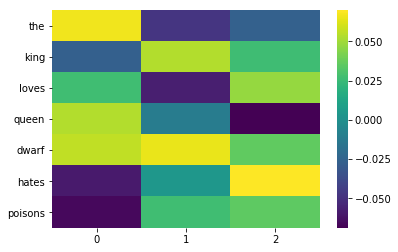

In [153]:
make_matrix_heatmap(WO.T, y_labels)

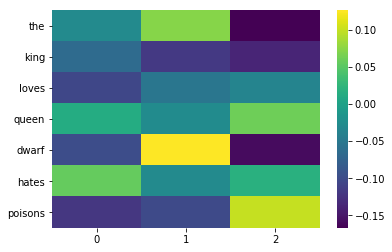

In [154]:
make_matrix_heatmap(WI, y_labels)

update output to hidden layer

In [171]:
target_word = 'king'
input_word = 'queen'
learning_rate = 1.0

for word in vocabulary:
    p_word_queen = (np.exp(np.dot(WO.T[vocabulary[word]], WI[vocabulary[input_word]])) / 
                    sum(np.exp(np.dot(WO.T[vocabulary[w]], WI[vocabulary[input_word]]))
                        for w in vocabulary))
    t = 1 if word == target_word else 0
    error = t - p_word_queen
    WO.T[vocabulary[word]] = (WO.T[vocabulary[word]] - learning_rate * 
                              error * WI[vocabulary[input_word]])
print(WO)

[[ 0.01681513  0.27229081 -0.02219626  0.00354072  0.0072941  -0.10869469
  -0.11566939]
 [-0.11205036  0.44168884 -0.12187341 -0.07628057  0.00159279 -0.05947999
  -0.0371959 ]
 [-0.11271771  0.54185929 -0.03772813 -0.15549759 -0.04869057 -0.01520432
  -0.05040959]]


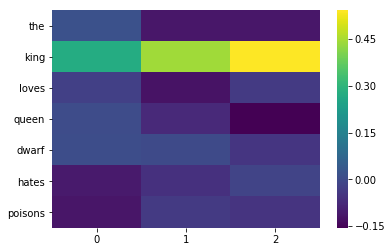

In [172]:
make_matrix_heatmap(WO.T, y_labels)

update hidden to input layer

In [173]:
WI[vocabulary[input_word]] = WI[vocabulary[input_word]] - learning_rate * WO.sum(1)
for word in vocabulary:
    p = (np.exp(np.dot(WO.T[vocabulary[word]], WI[vocabulary[input_word]])) / 
         sum(np.exp(np.dot(WO.T[vocabulary[w]], WI[vocabulary[input_word]])) 
             for w in vocabulary))
    print(word, p)

loves 0.148913306463
the 0.152247044072
hates 0.148475000688
queen 0.154476857857
king 0.0999361437469
dwarf 0.145623770776
poisons 0.150327876396


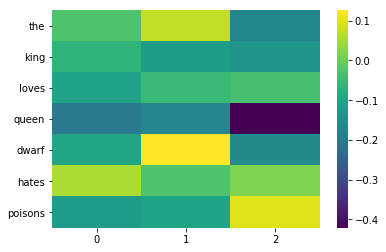

In [174]:
make_matrix_heatmap(WI, y_labels)

## multi word input

In [29]:
target_word = 'king'
context = ['queen', 'loves']

In [30]:
h = (WI[vocabulary['queen']] + WI[vocabulary['loves']]) / 2

In [31]:
for word in vocabulary:
    p_word_context = (np.exp(np.dot(WO.T[vocabulary[word]], h)) / 
                            sum(np.exp(np.dot(WO.T[vocabulary[w]], h)) for w in vocabulary))
    t = 1 if word == target_word else 0
    error = t - p_word_context
    WO.T[vocabulary[word]] = WO.T[vocabulary[word]] - learning_rate * error * h
print(WO)

[[ 0.05335756 -0.10242492  0.04100276  0.07545827  0.04128714 -0.02606417
   0.04728608]
 [-0.04829415 -0.05757077  0.0671795  -0.02118427 -0.02224489 -0.04416342
  -0.06077297]
 [ 0.0234273  -0.02816536 -0.03523226 -0.00341791 -0.06627067  0.00878361
  -0.05310198]]


In [32]:
for input_word in context:
    WI[vocabulary[input_word]] = (WI[vocabulary[input_word]] - (1. / len(context)) * 
                                  learning_rate * WO.sum(1))

In [33]:
h = (WI[vocabulary['queen']] + WI[vocabulary['loves']]) / 2
for word in vocabulary:
    p = (np.exp(np.dot(WO.T[vocabulary[word]], h)) / 
               sum(np.exp(np.dot(WO.T[vocabulary[w]], h)) for w in vocabulary))
    print(word, p)

loves 0.145206738677
the 0.142707530381
hates 0.144220430718
queen 0.142314216103
king 0.144358085755
dwarf 0.141122385799
poisons 0.140070612567
